### linear regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = boston.data

In [6]:
data.shape

(506, 13)

In [7]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
target = boston.target
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
X = pd.DataFrame(data, columns=feature_names)

In [12]:
X.shape

(506, 13)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [14]:
y = pd.DataFrame(target, columns=['price'])

In [15]:
y.shape

(506, 1)

In [16]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [17]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
y_pred = lr.predict(X_test)

In [24]:
check_test = pd.DataFrame({'y_test': y_test['price'],
                          'y_pred': y_pred.flatten()},
                         columns=['y_test', 'y_pred'])

In [25]:
check_test.head(10)

,y_test,y_pred
173,23.6,28.838854
274,32.4,36.007833
491,13.6,15.083248
72,22.8,25.230909
452,16.1,18.878641
76,20.0,23.213983
316,17.8,17.593112
140,14.0,14.305081
471,19.6,23.054390
500,16.8,20.620083


In [26]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']

In [27]:
check_test.head()

,y_test,y_pred,error
173,23.6,28.838854,5.238854
274,32.4,36.007833,3.607833
491,13.6,15.083248,1.483248
72,22.8,25.230909,2.430909
452,16.1,18.878641,2.778641


In [28]:
initial_mse = (check_test['error'] ** 2).mean()
initial_mse

22.098694827098043

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
initial_mse = mean_squared_error(y_test, y_pred)
initial_mse

22.098694827098036

In [31]:
(np.abs(check_test['error'])).mean()

3.060939595437035

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
mean_absolute_error(y_test, y_pred)

3.060939595437034

In [34]:
from sklearn.metrics import r2_score

In [35]:
r2_score(y_test, y_pred)

0.6844267283527123

In [36]:
lr.intercept_

array([29.83642016])

In [37]:
lr.coef_

array([[-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,
         2.77350326e+00, -1.62388292e+01,  4.36875476e+00,
        -9.24808158e-03, -1.40086668e+00,  2.57761243e-01,
        -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]])

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Text(0, 0.5, 'feature')

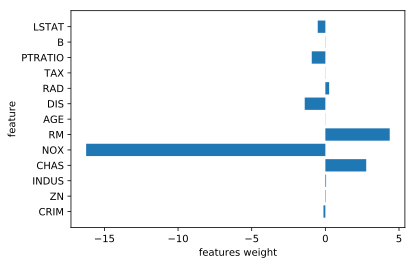

In [39]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('features weight')
plt.ylabel('feature')

In [40]:
# the features are not regularized
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.468655,11.596306,11.119974,0.076517,0.558326,6.323496,69.147230,3.763440,9.361478,405.311346,18.263852,358.767124,12.513298
std,8.313983,23.093394,6.953401,0.266175,0.119118,0.720086,27.703149,2.112633,8.601322,166.060463,2.263954,87.511867,7.147690
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081930,0.000000,5.130000,0.000000,0.453000,5.890000,46.250000,2.075400,4.000000,279.000000,16.600000,376.140000,6.865000
50%,0.269380,0.000000,9.690000,0.000000,0.538000,6.226000,78.100000,3.112100,5.000000,330.000000,18.600000,391.340000,11.220000
75%,3.242325,20.000000,18.100000,0.000000,0.639000,6.664500,93.850000,5.250950,16.000000,666.000000,20.200000,395.760000,16.395000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


##### let's standartize:

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
X_train_scaled = scaler.fit_transform(X_train)

In [44]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [45]:
X_test_scaled = scaler.transform(X_test)

In [46]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [47]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'feature')

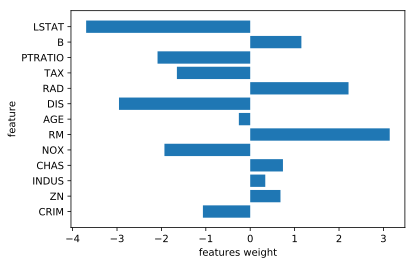

In [48]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('features weight')
plt.ylabel('feature')

In [49]:
# dropping 2 features with the least weight
feats = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [50]:
# making a function to calc lin regression & check error
def create_model(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:, feats], y_train)
    y_pred = model.predict(X_test.loc[:,feats])
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [51]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, LinearRegression())

21.79024941647527

In [52]:
initial_mse

22.098694827098036

In [53]:
from sklearn.linear_model import Lasso, Ridge

In [54]:
model = Lasso(alpha=0.003)

In [55]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

21.811408732029218

In [56]:
model = Ridge(alpha=0.001)

In [57]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

21.79027835256984

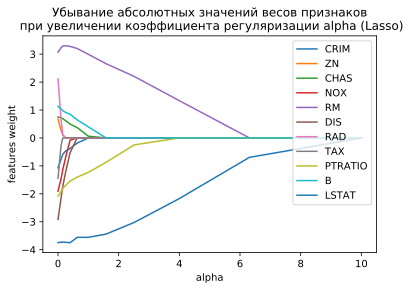

In [58]:
# checking & plotting different alphas
n = 21 
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3,1,n)
# alpha_list.shape
for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha=val)
    lasso.fit(X_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = lasso.coef_.flatten()
    
for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:,i])
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Lasso)')
plt.xlabel('alpha')
plt.ylabel('features weight')
plt.legend(feats)

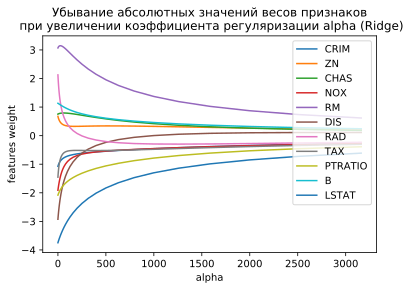

In [59]:
n=66
coeffs=np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 3.5, n)
for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val)
    ridge.fit(X_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = ridge.coef_.flatten()
    
for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])
    plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xlabel('alpha')
plt.ylabel('features weight')
plt.legend(feats)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
data = pd.read_csv('traint.csv')

In [62]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
data = data.set_index('PassengerId')

In [64]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
target = 'Survived'

In [67]:
y = data[target]

In [68]:
X = data.drop(target, axis=1)

In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [70]:
X = X.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [71]:
mean_age = X['Age'].mean()
mean_age

29.69911764705882

In [72]:
X['Age'] = X['Age'].fillna(mean_age)

In [73]:
X['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [74]:
X['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [75]:
embarked_mode = X['Embarked'].mode()[0]
embarked_mode

'S'

In [76]:
X['Embarked'] = X['Embarked'].fillna(embarked_mode)

In [77]:
X['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [79]:
X['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [80]:
X['Sex'] = (X['Sex'] == 'female').astype(int)

In [81]:
X['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [82]:
X = pd.get_dummies(X)

In [83]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,3,0,22.000000,1,0,7.2500,0,0,1
2,1,1,38.000000,1,0,71.2833,1,0,0
3,3,1,26.000000,0,0,7.9250,0,0,1
4,1,1,35.000000,1,0,53.1000,0,0,1
5,3,0,35.000000,0,0,8.0500,0,0,1
6,3,0,29.699118,0,0,8.4583,0,1,0
7,1,0,54.000000,0,0,51.8625,0,0,1
8,3,0,2.000000,3,1,21.0750,0,0,1
9,3,1,27.000000,0,2,11.1333,0,0,1


In [84]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Pclass        891 non-null int64
Sex           891 non-null int32
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 47.9 KB


In [86]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,0
3,3,1,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,3,0,35.0,0,0,8.0500,0,0,1


Pclass are values, but we cannot treat them as quantative values, zB difference between class 1 & 2 are not equal to difference between class 2 & 3 => need to get dummies

In [87]:
X['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [88]:
X['Pclass'] = X['Pclass'].astype('category')

In [89]:
X = pd.get_dummies(X)
X

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
1,0,22.000000,1,0,7.2500,0,0,1,0,0,1
2,1,38.000000,1,0,71.2833,1,0,0,1,0,0
3,1,26.000000,0,0,7.9250,0,0,1,0,0,1
4,1,35.000000,1,0,53.1000,0,0,1,1,0,0
5,0,35.000000,0,0,8.0500,0,0,1,0,0,1
6,0,29.699118,0,0,8.4583,0,1,0,0,0,1
7,0,54.000000,0,0,51.8625,0,0,1,1,0,0
8,0,2.000000,3,1,21.0750,0,0,1,0,0,1
9,1,27.000000,0,2,11.1333,0,0,1,0,0,1


In [90]:
X.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [91]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 299 to 103
Data columns (total 11 columns):
Sex           668 non-null int32
Age           668 non-null float64
SibSp         668 non-null int64
Parch         668 non-null int64
Fare          668 non-null float64
Embarked_C    668 non-null uint8
Embarked_Q    668 non-null uint8
Embarked_S    668 non-null uint8
Pclass_1      668 non-null uint8
Pclass_2      668 non-null uint8
Pclass_3      668 non-null uint8
dtypes: float64(2), int32(1), int64(2), uint8(6)
memory usage: 32.6 KB


In [93]:
lr = LogisticRegression()

In [94]:
lr.fit(X_train, y_train)

C:\Users\qu4n7\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
y_pred = lr.predict(X_valid)

In [96]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
accuracy_score(y_valid, y_pred)

0.8026905829596412

In [99]:
y_proba = lr.predict_proba(X_valid)

In [100]:
y_proba

array([[0.88825086, 0.11174914],
       [0.73066428, 0.26933572],
       [0.87036676, 0.12963324],
       [0.08974893, 0.91025107],
       [0.25113482, 0.74886518],
       [0.07820791, 0.92179209],
       [0.33314914, 0.66685086],
       [0.90541514, 0.09458486],
       [0.24423873, 0.75576127],
       [0.10298449, 0.89701551],
       [0.69421831, 0.30578169],
       [0.93503631, 0.06496369],
       [0.62521544, 0.37478456],
       [0.84802204, 0.15197796],
       [0.75860017, 0.24139983],
       [0.07875429, 0.92124571],
       [0.72740906, 0.27259094],
       [0.33306494, 0.66693506],
       [0.70241806, 0.29758194],
       [0.7064301 , 0.2935699 ],
       [0.88406868, 0.11593132],
       [0.64257008, 0.35742992],
       [0.39867144, 0.60132856],
       [0.86966316, 0.13033684],
       [0.89854394, 0.10145606],
       [0.9281918 , 0.0718082 ],
       [0.56595276, 0.43404724],
       [0.72830321, 0.27169679],
       [0.91438978, 0.08561022],
       [0.42690766, 0.57309234],
       [0.

In [101]:
X_train.to_pickle('X_train.pk1')
y_train.to_pickle('y_train.pk1')

X_valid.to_pickle('X_valid.pk1')
y_valid.to_pickle('y_valid.pk1')

In [102]:
from sklearn.svm import SVC

In [103]:
X_train = pd.read_pickle('X_train.pk1')
y_train = pd.read_pickle('y_train.pk1')

X_valid = pd.read_pickle('X_valid.pk1')
y_valid = pd.read_pickle('y_valid.pk1')

In [104]:
# нормализирую признаки
from sklearn.preprocessing import MinMaxScaler

In [105]:
scaler = MinMaxScaler()

In [106]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
299,0,29.699118,0,0,30.5000,0,0,1,1,0,0
885,0,25.000000,0,0,7.0500,0,0,1,0,0,1
248,1,24.000000,0,2,14.5000,0,0,1,0,1,0
479,0,22.000000,0,0,7.5208,0,0,1,0,0,1
306,0,0.920000,1,2,151.5500,0,0,1,1,0,0


In [107]:
X_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,29.476233,0.553892,0.372754,32.179397,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,13.009962,1.185279,0.795588,51.604012,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.925000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.400000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,30.500000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [109]:
X_train[cols_for_scale] = scaler.fit_transform(X_train[cols_for_scale])

C:\Users\qu4n7\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [110]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
299,0,0.367921,0.000,0.000000,0.059532,0,0,1,1,0,0
885,0,0.308872,0.000,0.000000,0.013761,0,0,1,0,0,1
248,1,0.296306,0.000,0.333333,0.028302,0,0,1,0,1,0
479,0,0.271174,0.000,0.000000,0.014680,0,0,1,0,0,1
306,0,0.006283,0.125,0.333333,0.295806,0,0,1,1,0,0


In [111]:
X_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,0.365120,0.069237,0.062126,0.062810,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,0.163483,0.148160,0.132598,0.100724,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.271174,0.000000,0.000000,0.015469,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.367921,0.000000,0.000000,0.028107,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.125000,0.000000,0.059532,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
X_valid[cols_for_scale] = scaler.transform(X_valid[cols_for_scale])

In [113]:
X_valid.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.381166,0.376310,0.053812,0.068012,0.063003,0.22870,0.085202,0.686099,0.286996,0.192825,0.520179
std,0.486766,0.163162,0.100208,0.139652,0.085059,0.42094,0.279810,0.465121,0.453377,0.395404,0.500717
min,0.000000,0.005152,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.283740,0.000000,0.000000,0.015412,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.367921,0.000000,0.000000,0.029758,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.447097,0.125000,0.166667,0.061155,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,0.886906,0.500000,0.833333,0.512122,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
from sklearn.externals import joblib

In [115]:
joblib.dump(scaler, 'min_max_scaler.pkl')

['min_max_scaler.pkl']

In [116]:
scaler = joblib.load('min_max_scaler.pkl')

In [117]:
clf = SVC()

In [118]:
clf.fit(X_train, y_train)

C:\Users\qu4n7\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [119]:
y_pred = clf.predict(X_valid)

In [120]:
y_pred.shape

(223,)

In [121]:
y_pred_train = clf.predict(X_train)

In [122]:
y_pred_train.shape

(668,)

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
accuracy_score(y_valid, y_pred)

0.7847533632286996

In [125]:
accuracy_score(y_train, y_pred_train)

0.7874251497005988

In [126]:
c_vals = np.logspace(-2, 3, 29)
c_vals

array([1.00000000e-02, 1.50859071e-02, 2.27584593e-02, 3.43332002e-02,
       5.17947468e-02, 7.81370738e-02, 1.17876863e-01, 1.77827941e-01,
       2.68269580e-01, 4.04708995e-01, 6.10540230e-01, 9.21055318e-01,
       1.38949549e+00, 2.09617999e+00, 3.16227766e+00, 4.77058270e+00,
       7.19685673e+00, 1.08571112e+01, 1.63789371e+01, 2.47091123e+01,
       3.72759372e+01, 5.62341325e+01, 8.48342898e+01, 1.27980221e+02,
       1.93069773e+02, 2.91263265e+02, 4.39397056e+02, 6.62870316e+02,
       1.00000000e+03])

In [127]:
accuracy_valid = []
accuracy_train = []
for val in c_vals:
    clf = SVC(C=val, gamma='auto')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print(f'C = {val}\n\tacc_valid = {acc_valid}\n\tacc_train = {acc_train}')

C = 0.01
	acc_valid = 0.600896860986547
	acc_train = 0.6212574850299402
C = 0.015085907086001785
	acc_valid = 0.600896860986547
	acc_train = 0.6212574850299402
C = 0.022758459260747887
	acc_valid = 0.600896860986547
	acc_train = 0.6212574850299402
C = 0.034333200182819934
	acc_valid = 0.600896860986547
	acc_train = 0.6212574850299402
C = 0.05179474679231213
	acc_valid = 0.726457399103139
	acc_train = 0.7215568862275449
C = 0.07813707376518093
	acc_valid = 0.7847533632286996
	acc_train = 0.7874251497005988
C = 0.11787686347935872
	acc_valid = 0.7847533632286996
	acc_train = 0.7874251497005988
C = 0.1778279410038923
	acc_valid = 0.7847533632286996
	acc_train = 0.7874251497005988
C = 0.2682695795279726
	acc_valid = 0.7847533632286996
	acc_train = 0.7874251497005988
C = 0.40470899507597613
	acc_valid = 0.7847533632286996
	acc_train = 0.7874251497005988
C = 0.6105402296585329
	acc_valid = 0.7847533632286996
	acc_train = 0.7874251497005988
C = 0.921055317689482
	acc_valid = 0.784753363228699

In [128]:
accuracy_valid_scaled = []
accuracy_train_scaled = []
for val in c_vals:
    clf = SVC(C=val, gamma='scale')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    acc_valid_scaled = accuracy_score(y_valid, y_pred)
    acc_train_scaled = accuracy_score(y_train, y_pred_train)
    accuracy_valid_scaled.append(acc_valid_scaled)
    accuracy_train_scaled.append(acc_train_scaled)
    print(f'C = {val}\n\tacc_valid_scaled = {acc_valid_scaled}\n\tacc_train_scaled = {acc_train_scaled}')

C = 0.01
	acc_valid_scaled = 0.600896860986547
	acc_train_scaled = 0.6212574850299402
C = 0.015085907086001785
	acc_valid_scaled = 0.600896860986547
	acc_train_scaled = 0.6212574850299402
C = 0.022758459260747887
	acc_valid_scaled = 0.600896860986547
	acc_train_scaled = 0.6212574850299402
C = 0.034333200182819934
	acc_valid_scaled = 0.7802690582959642
	acc_train_scaled = 0.7859281437125748
C = 0.05179474679231213
	acc_valid_scaled = 0.7847533632286996
	acc_train_scaled = 0.7919161676646707
C = 0.07813707376518093
	acc_valid_scaled = 0.7847533632286996
	acc_train_scaled = 0.7874251497005988
C = 0.11787686347935872
	acc_valid_scaled = 0.7847533632286996
	acc_train_scaled = 0.7874251497005988
C = 0.1778279410038923
	acc_valid_scaled = 0.7847533632286996
	acc_train_scaled = 0.7874251497005988
C = 0.2682695795279726
	acc_valid_scaled = 0.7847533632286996
	acc_train_scaled = 0.7934131736526946
C = 0.40470899507597613
	acc_valid_scaled = 0.8071748878923767
	acc_train_scaled = 0.80988023952095

In [129]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

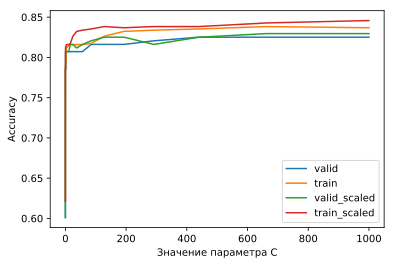

In [130]:
plt.plot(c_vals, accuracy_valid)
plt.plot(c_vals, accuracy_train)
plt.plot(c_vals, accuracy_valid_scaled)
plt.plot(c_vals, accuracy_train_scaled)
plt.xlabel('Значение параметра C')
plt.ylabel('Accuracy')
plt.legend(['valid', 'train', 'valid_scaled', 'train_scaled'])

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
X_train = pd.read_pickle('X_train.pk1')
y_train = pd.read_pickle('y_train.pk1')

X_valid = pd.read_pickle('X_valid.pk1')
y_valid = pd.read_pickle('y_valid.pk1')

In [133]:
from sklearn.preprocessing import RobustScaler

In [134]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [135]:
scaler = RobustScaler()

In [136]:
X_train[cols_for_scale] = scaler.fit_transform(X_train[cols_for_scale])

In [137]:
X_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,-0.017145,0.553892,0.372754,0.787570,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,1.000766,1.185279,0.795588,2.285892,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,-2.252240,0.000000,0.000000,-0.637874,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.592240,0.000000,0.000000,-0.286822,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.407760,1.000000,0.000000,0.713178,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.869299,8.000000,6.000000,22.056664,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
X_valid[cols_for_scale] = scaler.transform(X_valid[cols_for_scale])

In [139]:
k_vals = np.arange(2,15)

In [140]:
accuracy_valid = []
accuracy_train = []
for val in k_vals:
    clf = KNeighborsClassifier(n_neighbors=val)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print(f'n_neighbors = {val} \n\tacc_valid = {acc_valid} \n\tacc_train = {acc_train}\n')

n_neighbors = 2 
	acc_valid = 0.7937219730941704 
	acc_train = 0.8772455089820359

n_neighbors = 3 
	acc_valid = 0.8161434977578476 
	acc_train = 0.875748502994012

n_neighbors = 4 
	acc_valid = 0.7892376681614349 
	acc_train = 0.8458083832335329

n_neighbors = 5 
	acc_valid = 0.8071748878923767 
	acc_train = 0.8637724550898204

n_neighbors = 6 
	acc_valid = 0.8251121076233184 
	acc_train = 0.8353293413173652

n_neighbors = 7 
	acc_valid = 0.7847533632286996 
	acc_train = 0.8323353293413174

n_neighbors = 8 
	acc_valid = 0.7713004484304933 
	acc_train = 0.8173652694610778

n_neighbors = 9 
	acc_valid = 0.7802690582959642 
	acc_train = 0.8173652694610778

n_neighbors = 10 
	acc_valid = 0.8071748878923767 
	acc_train = 0.811377245508982

n_neighbors = 11 
	acc_valid = 0.7982062780269058 
	acc_train = 0.8188622754491018

n_neighbors = 12 
	acc_valid = 0.8071748878923767 
	acc_train = 0.811377245508982

n_neighbors = 13 
	acc_valid = 0.8116591928251121 
	acc_train = 0.8158682634730539

n_n

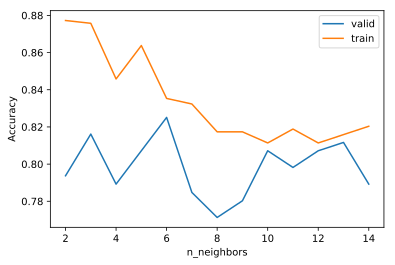

In [141]:
plt.plot(k_vals, accuracy_valid)
plt.plot(k_vals, accuracy_train)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['valid', 'train'])

In [142]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_valid)

In [143]:
accuracy_score(y_valid, y_pred)

0.8071748878923767

In [144]:
y_valid.value_counts(normalize=True)

0    0.600897
1    0.399103
Name: Survived, dtype: float64

In [145]:
from sklearn.metrics import confusion_matrix

In [146]:
confusion_matrix(y_valid, y_pred)

array([[113,  21],
       [ 22,  67]], dtype=int64)

In [147]:
TN = ((y_valid == 0) & (y_pred == 0)).sum()
TN

113

In [148]:
FP = ((y_valid == 0) & (y_pred == 1)).sum()
FP

21

In [149]:
FN = ((y_valid == 1) & (y_pred == 0)).sum()
FN

22

In [150]:
TP = ((y_valid == 1) & (y_pred == 1)).sum()
TP

67

In [151]:
cm = confusion_matrix(y_valid, y_pred) / y_valid.shape[0]
cm

array([[0.50672646, 0.0941704 ],
       [0.09865471, 0.30044843]])

In [171]:
Precision = TP / (TP + FP)
Precision

0.7613636363636364

In [172]:
from sklearn.metrics import precision_score

In [173]:
precision_score(y_valid, y_pred)

0.8157894736842105

In [174]:
Recall = TP / (TP + FN)
Recall

0.7528089887640449

In [175]:
from sklearn.metrics import recall_score

In [176]:
precision_score(y_valid, y_pred)

0.8157894736842105

In [177]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)
F1

0.7570621468926553

In [178]:
from sklearn.metrics import f1_score

In [179]:
f1_score(y_valid, y_pred)

0.7515151515151515

In [180]:
y_pred_proba = clf.predict_proba(X_valid)

In [181]:
y_pred_proba

array([[0.79890045, 0.20109955],
       [0.87721889, 0.12278111],
       [0.86661181, 0.13338819],
       [0.04300787, 0.95699213],
       [0.44954594, 0.55045406],
       [0.09077171, 0.90922829],
       [0.3223008 , 0.6776992 ],
       [0.84843971, 0.15156029],
       [0.34674023, 0.65325977],
       [0.10159606, 0.89840394],
       [0.61708682, 0.38291318],
       [0.89857861, 0.10142139],
       [0.7589457 , 0.2410543 ],
       [0.87838357, 0.12161643],
       [0.86489173, 0.13510827],
       [0.08412204, 0.91587796],
       [0.63877078, 0.36122922],
       [0.33154262, 0.66845738],
       [0.86600998, 0.13399002],
       [0.73559981, 0.26440019],
       [0.88068777, 0.11931223],
       [0.66261507, 0.33738493],
       [0.55262576, 0.44737424],
       [0.88739043, 0.11260957],
       [0.87811213, 0.12188787],
       [0.81215389, 0.18784611],
       [0.6653047 , 0.3346953 ],
       [0.86255911, 0.13744089],
       [0.60794412, 0.39205588],
       [0.49327798, 0.50672202],
       [0.

In [182]:
y_pred_proba = y_pred_proba[:,1]

In [183]:
y_pred_proba

array([0.20109955, 0.12278111, 0.13338819, 0.95699213, 0.55045406,
       0.90922829, 0.6776992 , 0.15156029, 0.65325977, 0.89840394,
       0.38291318, 0.10142139, 0.2410543 , 0.12161643, 0.13510827,
       0.91587796, 0.36122922, 0.66845738, 0.13399002, 0.26440019,
       0.11931223, 0.33738493, 0.44737424, 0.11260957, 0.12188787,
       0.18784611, 0.3346953 , 0.13744089, 0.39205588, 0.50672202,
       0.11648465, 0.50429082, 0.34908239, 0.6023999 , 0.11967932,
       0.21552074, 0.30957694, 0.6776992 , 0.88084526, 0.11348682,
       0.17400531, 0.12655828, 0.11291687, 0.11992391, 0.50215274,
       0.1560667 , 0.11896398, 0.11077345, 0.1250478 , 0.43357422,
       0.71289843, 0.97523902, 0.11868968, 0.55769388, 0.12031807,
       0.92257732, 0.12379609, 0.93043242, 0.91566904, 0.61208405,
       0.12128997, 0.95982972, 0.93112878, 0.24832577, 0.11992391,
       0.93221018, 0.21135305, 0.12765978, 0.22959051, 0.9542286 ,
       0.88058049, 0.88592189, 0.43568093, 0.97970754, 0.12001

Text(0, 0.5, 'Количество')

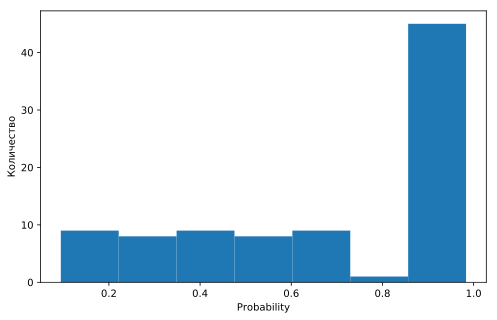

In [185]:
plt.hist(y_pred_proba[y_valid == 1], bins = 7)
plt.xlabel('Probability')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

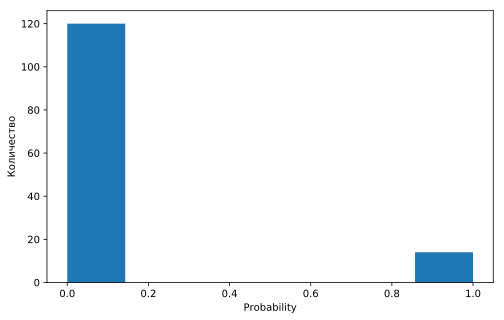

In [186]:
plt.hist(y_pred[y_valid == 0], bins = 7)
plt.xlabel('Probability')
plt.ylabel('Количество')

Text(0, 0.5, 'Density')

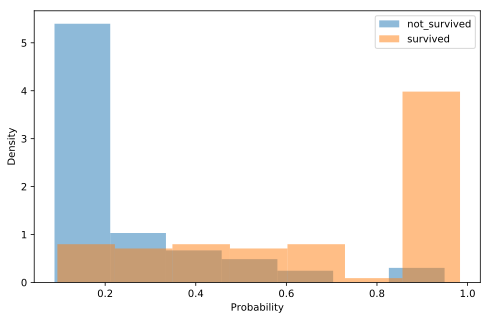

In [188]:
plt.hist(y_pred_proba[y_valid == 0], bins=7, density=True, alpha=0.5)
plt.hist(y_pred_proba[y_valid == 1], bins=7, density=True, alpha=0.5)
plt.legend(['not_survived', 'survived'])
plt.xlabel('Probability')
plt.ylabel('Density')

In [189]:
from sklearn.metrics import roc_curve

In [191]:
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba, pos_label=1)

In [192]:
fpr

array([0.        , 0.        , 0.        , 0.00746269, 0.00746269,
       0.01492537, 0.01492537, 0.02238806, 0.02238806, 0.02985075,
       0.02985075, 0.03731343, 0.03731343, 0.04477612, 0.04477612,
       0.04477612, 0.05223881, 0.05223881, 0.05970149, 0.05970149,
       0.06716418, 0.06716418, 0.07462687, 0.07462687, 0.08208955,
       0.08208955, 0.09701493, 0.09701493, 0.12686567, 0.12686567,
       0.13432836, 0.13432836, 0.17164179, 0.17164179, 0.17910448,
       0.17910448, 0.18656716, 0.18656716, 0.20149254, 0.20149254,
       0.20895522, 0.20895522, 0.2238806 , 0.2238806 , 0.24626866,
       0.24626866, 0.25373134, 0.25373134, 0.28358209, 0.29850746,
       0.34328358, 0.34328358, 0.40298507, 0.40298507, 0.46268657,
       0.46268657, 0.47014925, 0.47014925, 0.47761194, 0.49253731,
       0.68656716, 0.70149254, 0.70149254, 0.7761194 , 0.80597015,
       0.82089552, 0.86567164, 0.87313433, 0.88059701, 0.89552239,
       0.91791045, 0.93283582, 0.93283582, 0.94029851, 0.94776

In [193]:
tpr

array([0.        , 0.01123596, 0.2247191 , 0.24719101, 0.25842697,
       0.25842697, 0.29213483, 0.29213483, 0.30337079, 0.30337079,
       0.50561798, 0.50561798, 0.52808989, 0.52808989, 0.5505618 ,
       0.58426966, 0.58426966, 0.60674157, 0.60674157, 0.61797753,
       0.61797753, 0.62921348, 0.62921348, 0.6741573 , 0.6741573 ,
       0.68539326, 0.68539326, 0.69662921, 0.69662921, 0.73033708,
       0.73033708, 0.74157303, 0.74157303, 0.75280899, 0.75280899,
       0.78651685, 0.78651685, 0.80898876, 0.80898876, 0.83146067,
       0.83146067, 0.84269663, 0.84269663, 0.85393258, 0.85393258,
       0.86516854, 0.86516854, 0.8988764 , 0.8988764 , 0.8988764 ,
       0.8988764 , 0.92134831, 0.92134831, 0.93258427, 0.93258427,
       0.94382022, 0.94382022, 0.95505618, 0.95505618, 0.95505618,
       0.95505618, 0.95505618, 0.96629213, 0.96629213, 0.96629213,
       0.96629213, 0.96629213, 0.96629213, 0.97752809, 0.97752809,
       0.97752809, 0.97752809, 0.98876404, 0.98876404, 1.     

In [194]:
thresholds

array([1.98335621, 0.98335621, 0.95299885, 0.94927835, 0.94362121,
       0.94101138, 0.93513109, 0.93337787, 0.93308443, 0.93221018,
       0.88084526, 0.88058049, 0.71289843, 0.69839011, 0.6776992 ,
       0.66557694, 0.65985122, 0.6197841 , 0.61299343, 0.61208405,
       0.6023999 , 0.58531261, 0.57215744, 0.53841582, 0.52922716,
       0.52663109, 0.50672202, 0.50429082, 0.48255778, 0.43568093,
       0.43357422, 0.43272742, 0.38291318, 0.38228811, 0.3680385 ,
       0.36122922, 0.35770239, 0.35549733, 0.34908239, 0.33738493,
       0.3346953 , 0.33059347, 0.32421564, 0.31867219, 0.30958634,
       0.30957694, 0.29208833, 0.26615233, 0.24306964, 0.2410543 ,
       0.20312374, 0.20109955, 0.17400531, 0.16420542, 0.14394171,
       0.14161595, 0.14124632, 0.13744089, 0.13632052, 0.13510827,
       0.12001831, 0.11992391, 0.11967932, 0.11416823, 0.11348682,
       0.11339133, 0.11266322, 0.11260957, 0.11196529, 0.11077345,
       0.11046639, 0.1065005 , 0.10530791, 0.10142139, 0.09451

In [196]:
# FPR для порога, равного 1
((y_valid == 0) & (y_pred == 1) & (y_pred_proba >= 1)).sum() / (y_valid == 0).sum()

0.0

In [198]:
# TPR для порога, равного 1
((y_valid == 1) & (y_pred == 1) & (y_pred_proba >= 1)).sum() / (y_valid == 1).sum()

0.0

In [199]:
# FPR для порога, равного 0.83333333
((y_valid == 0) & (y_pred == 1) & (y_pred_proba >= 0.83333333)).sum() / (y_valid == 0).sum()

0.03731343283582089

In [200]:
# TPR для порога, равного 0.83333333
((y_valid == 1) & (y_pred == 1) & (y_pred_proba >= 0.83333333)).sum() / (y_valid == 1).sum()

0.5168539325842697

Text(0.5, 1.0, 'Receiver operating characteristic (ROC)')

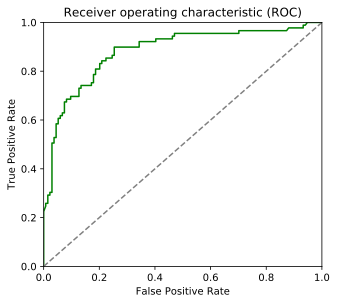

In [201]:
rcParams['figure.figsize'] = 5, 4.5
plt.plot(fpr, tpr, color='green', label='ROC curve')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')

In [202]:
from sklearn.metrics import roc_auc_score

In [203]:
roc_auc_score(y_valid, y_pred_proba)

0.8815193694449104

In [152]:
from pylab import rcParams

%config InlineBackend.figure_format = 'svg'

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
X_train = pd.read_pickle('X_train.pk1')
y_train = pd.read_pickle('y_train.pk1')

X_valid = pd.read_pickle('X_valid.pk1')
y_valid = pd.read_pickle('y_valid.pk1')

In [155]:
max_depth_arr = np.arange(2, 20)
max_depth_arr

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [156]:
accuracy_valid = []
accuracy_train = []
for val in max_depth_arr:
    clf = DecisionTreeClassifier(max_depth=val, random_state=100)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print(f'max_depth = {val}\nacc_valid = {acc_valid}\nacc_train = {acc_train}')

max_depth = 2
acc_valid = 0.7757847533632287
acc_train = 0.8023952095808383
max_depth = 3
acc_valid = 0.8026905829596412
acc_train = 0.8323353293413174
max_depth = 4
acc_valid = 0.8071748878923767
acc_train = 0.842814371257485
max_depth = 5
acc_valid = 0.8026905829596412
acc_train = 0.8488023952095808
max_depth = 6
acc_valid = 0.7713004484304933
acc_train = 0.8577844311377245
max_depth = 7
acc_valid = 0.8116591928251121
acc_train = 0.875748502994012
max_depth = 8
acc_valid = 0.7623318385650224
acc_train = 0.8967065868263473
max_depth = 9
acc_valid = 0.7713004484304933
acc_train = 0.9131736526946108
max_depth = 10
acc_valid = 0.7443946188340808
acc_train = 0.9341317365269461
max_depth = 11
acc_valid = 0.7533632286995515
acc_train = 0.9491017964071856
max_depth = 12
acc_valid = 0.7488789237668162
acc_train = 0.9580838323353293
max_depth = 13
acc_valid = 0.7443946188340808
acc_train = 0.9700598802395209
max_depth = 14
acc_valid = 0.7309417040358744
acc_train = 0.9760479041916168
max_depth

(2, 8)

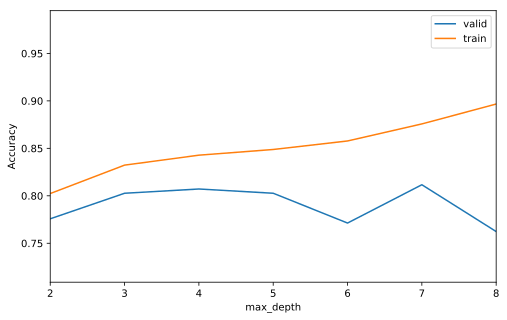

In [157]:
rcParams['figure.figsize'] = 8,5
plt.plot(max_depth_arr, accuracy_valid)
plt.plot(max_depth_arr, accuracy_train)

plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(['valid', 'train'])

plt.xlim(2, 8)

In [158]:
clf = DecisionTreeClassifier(max_depth=7, random_state=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [159]:
accuracy_score(y_valid, y_pred)

0.8116591928251121

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
parameters = [{'n_estimators': [150, 200, 250],
              'max_features': np.arange(5,9),
              'max_depth': np.arange(5, 10)}]

In [163]:
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                  param_grid=parameters,
                  scoring='accuracy',
                  cv=5)

In [164]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [150, 200, 250], 'max_features': array([5, 6, 7, 8]), 'max_depth': array([5, 6, 7, 8, 9])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [165]:
clf.best_params_

{'max_depth': 5, 'max_features': 5, 'n_estimators': 200}

In [166]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(mean)
    print(stds)
    print(params)

0.8218562874251497
[0.035049   0.03446633 0.0334173  0.0394409  0.0394409  0.03934792
 0.03857877 0.03742168 0.03647933 0.03041957 0.03423932 0.03277848
 0.02904203 0.02772988 0.03109008 0.04080152 0.04157343 0.03917196
 0.03557129 0.03881079 0.03394105 0.02652198 0.03005613 0.03190084
 0.02576145 0.02744132 0.02938618 0.0362618  0.03190084 0.02744132
 0.02963697 0.02868903 0.02720365 0.02498553 0.02498221 0.02250123
 0.01951873 0.0201252  0.0201252  0.0232218  0.02587532 0.02041891
 0.02228385 0.02317993 0.02622899 0.01965267 0.02206058 0.02317993
 0.02213325 0.02345964 0.01946968 0.02881824 0.0297519  0.02318364
 0.02196563 0.01817321 0.01860608 0.02374729 0.02516423 0.026037  ]
{'max_depth': 5, 'max_features': 5, 'n_estimators': 150}
0.8248502994011976
[0.035049   0.03446633 0.0334173  0.0394409  0.0394409  0.03934792
 0.03857877 0.03742168 0.03647933 0.03041957 0.03423932 0.03277848
 0.02904203 0.02772988 0.03109008 0.04080152 0.04157343 0.03917196
 0.03557129 0.03881079 0.03394105

In [167]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))

0.822 (+/-0.070) for {'max_depth': 5, 'max_features': 5, 'n_estimators': 150}
0.825 (+/-0.069) for {'max_depth': 5, 'max_features': 5, 'n_estimators': 200}
0.822 (+/-0.067) for {'max_depth': 5, 'max_features': 5, 'n_estimators': 250}
0.819 (+/-0.079) for {'max_depth': 5, 'max_features': 6, 'n_estimators': 150}
0.819 (+/-0.079) for {'max_depth': 5, 'max_features': 6, 'n_estimators': 200}
0.820 (+/-0.079) for {'max_depth': 5, 'max_features': 6, 'n_estimators': 250}
0.822 (+/-0.077) for {'max_depth': 5, 'max_features': 7, 'n_estimators': 150}
0.823 (+/-0.075) for {'max_depth': 5, 'max_features': 7, 'n_estimators': 200}
0.822 (+/-0.073) for {'max_depth': 5, 'max_features': 7, 'n_estimators': 250}
0.819 (+/-0.061) for {'max_depth': 5, 'max_features': 8, 'n_estimators': 150}
0.816 (+/-0.068) for {'max_depth': 5, 'max_features': 8, 'n_estimators': 200}
0.820 (+/-0.066) for {'max_depth': 5, 'max_features': 8, 'n_estimators': 250}
0.817 (+/-0.058) for {'max_depth': 6, 'max_features': 5, 'n_esti

In [168]:
y_pred = clf.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.8161434977578476

In [169]:
clf = RandomForestClassifier(max_depth=5, max_features=5, n_estimators=200, random_state=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [170]:
accuracy_score(y_valid, y_pred)

0.8161434977578476